# Step 1: Importing relevant libraries

In [589]:
#import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

import os
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import confusion_matrix, log_loss
from scipy.stats import skew

import seaborn as sns

# Step 2: Loading Dataset
##White wine Quality Prediction Dataset From Kaggle

In [590]:
#load the dataset
df=pd.read_csv('winequality-white.csv',sep=';')
#df=np.genfromtxt('winequality-white.csv',delimiter =';')

In [591]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [592]:
# Function to select white dataset
def call(functionToCall):
    print('\nWhite Wine\n')
    functionToCall(df)

In [593]:
# Remove spaces from column names
def rm(wine_set):
    wine_set.columns = [x.strip().replace(' ','_') for x in wine_set.columns]
call(rm)


White Wine



In [594]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# Step 3: Exploratory Data Analysis, summary and Visualizations

In [595]:
df.shape

(4898, 12)

In [596]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [597]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [598]:
np.sum(df.isnull())
assert np.sum(np.sum(df.isnull())==0)
#'condition: if it fails it suggests that the dataset now has nulls'

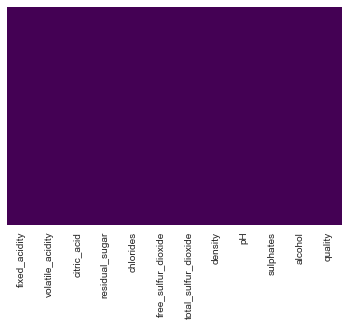

In [599]:
#DATA VISUALIZATION
#to check missing values
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')
###shows that there are no missing values in the dataset,
#missing values would have been indicated as diff shades of purple on the heat map.

# Step 4: Data Preprocessing

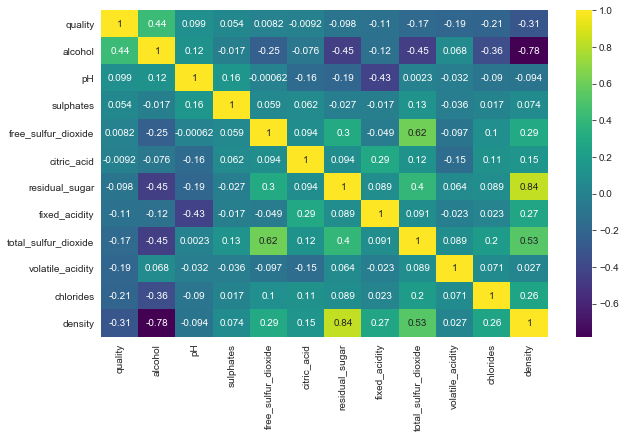

In [600]:
#Quality correlation matrix
k=12 #number of variables for heatmap
cols=df.corr().nlargest(k,'quality')['quality'].index
cm=df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,cmap='viridis')

'''Dark shades represent negative correlation while lighter shades represent positive correlation,here we can 
infer that "density" has strong positive correlation with "residual sugar". free sulpher dioxide" and has 
"citric acid" almost no correlation with "quality" since corr is 0 we can infer there is no linear relationship 
between these two predictors.Therefore it is safe to drop these variables .'''


White Wine



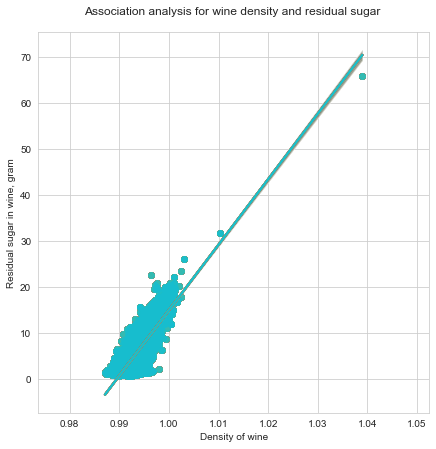

(0.8389664549045835, 0.0)

White Wine



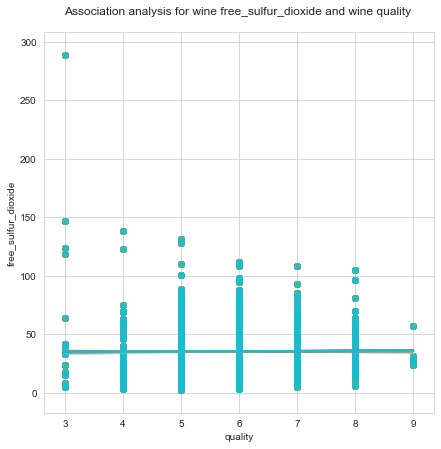


White Wine



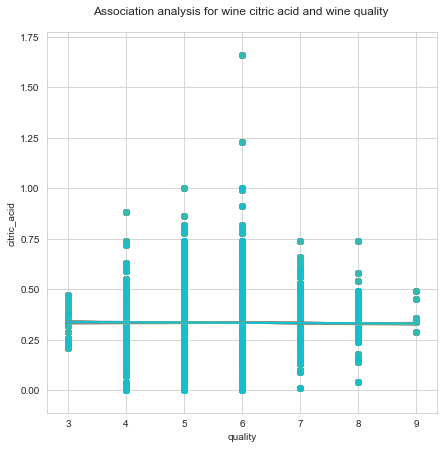

(-0.009209090883975446, 0.5193459380150888)


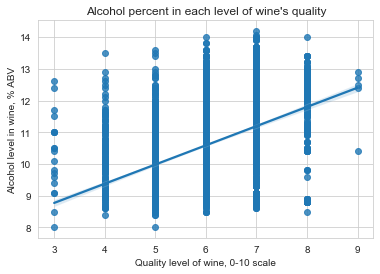

(0.4355747154613735, 5.614770253759131e-226)


In [601]:
import scipy

# Pearson Correlation

def pearson(df):
    for i in range(0,len(l)):
         scat1 = sns.regplot(x = "density", y = "residual_sugar", fit_reg = True, data = df)
    scat1.figure.set_size_inches(7,7)
    plt.xlabel("Density of wine")
    plt.ylabel("Residual sugar in wine, gram")
    plt.title("Association analysis for wine density and residual sugar \n")
    plt.show()
    print(scipy.stats.pearsonr(df['density'], df["residual_sugar"]))

call(pearson)

def pearson(df):
    for i in range(0,len(l)):
         scat1 = sns.regplot(x = "quality", y = "free_sulfur_dioxide", fit_reg = True, data = df)
    scat1.figure.set_size_inches(7,7)
    plt.xlabel("quality")
    plt.ylabel("free_sulfur_dioxide")
    plt.title("Association analysis for wine free_sulfur_dioxide and wine quality \n")
    plt.show()

call(pearson)

def pearson(df):
    for i in range(0,len(l)):
         scat1 = sns.regplot(x = "quality", y = "citric_acid", fit_reg = True, data = df)
    scat1.figure.set_size_inches(7,7)
    plt.xlabel("quality")
    plt.ylabel("citric_acid")
    plt.title("Association analysis for wine citric acid and wine quality \n")
    plt.show()
    print(scipy.stats.pearsonr(df['quality'], df["citric_acid"]))

call(pearson)


import seaborn as sns

#provides measure of relationship between a numerical and one or more categorical variables.

sns.regplot(x="quality", y="alcohol", data=df)
plt.xlabel("Quality level of wine, 0-10 scale")
plt.ylabel("Alcohol level in wine, % ABV")
plt.title("Alcohol percent in each level of wine's quality")
plt.show()
print(scipy.stats.pearsonr(df['quality'], df["alcohol"]))


# Pearson correlation coefficient and p-value for testing non-correlation.

# The calculation of the p-value relies on the assumption that each dataset is normally distributed.
# Like other correlation coefficients, this one varies between -1 and +1 with 0 
# implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. 
# Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases,
# y decreases.
# The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson
# correlation at least as extreme as the one computed from these datasets.

In [602]:
df=df.drop(columns=['citric_acid', 'free_sulfur_dioxide'])

In [603]:
df

,fixed_acidity,volatile_acidity,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,20.7,0.045,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,1.6,0.049,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,6.9,0.050,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,8.5,0.058,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,8.5,0.058,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,1.6,0.039,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,8.0,0.047,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,1.2,0.041,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,1.1,0.022,110.0,0.98869,3.34,0.38,12.8,7


In [605]:
df.quality.unique()


array([6, 5, 7, 8, 4, 3, 9])

In [606]:
qual=df.quality.value_counts()
qual

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

This is the frequency distribution of the white wines' quality.


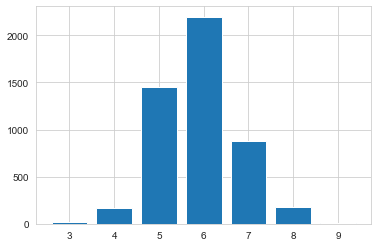

In [607]:
print("This is the frequency distribution of the white wines' quality.")
plt.bar(x=[6,5,7,8,4,3,9],height=qual)
plt.show()

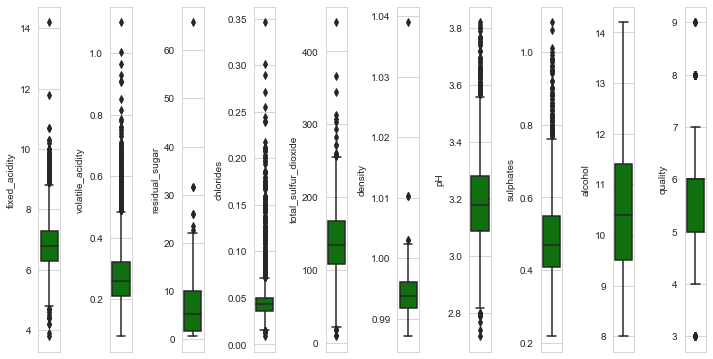

In [608]:
##To check Outliers, we plot the boxplot
l=df.columns.values
number_of_columns=12
number_of_rows=len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range (0,len(l)):
    plt.subplot(number_of_rows+1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()

'we find from the distribution plots below the skewness, since there are some extreme \npositive values towards the right which might be considered as outliers.Now we start with Data Preprocessing, we check on parameters like Data Skewness and missing values which might \ncause issues like bad prediction accuracy '

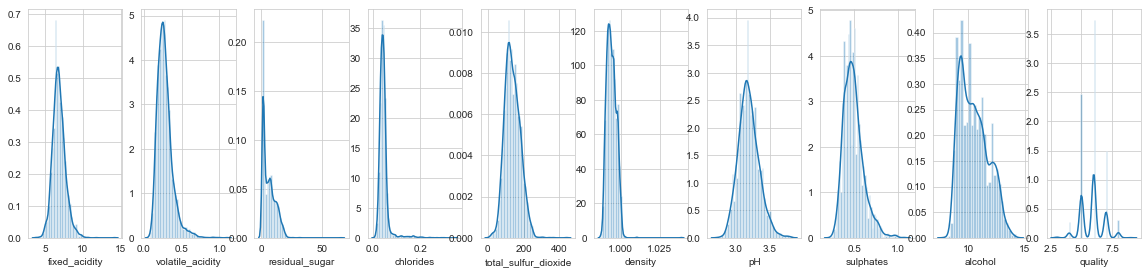

In [609]:
##To check distribution skewness
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows+1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True)
    
'''we find from the distribution plots below the skewness, since there are some extreme 
positive values towards the right which might be considered as outliers.Now we start with Data Preprocessing, we check on parameters like Data Skewness and missing values which might 
cause issues like bad prediction accuracy '''    

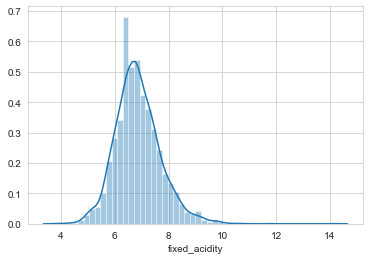

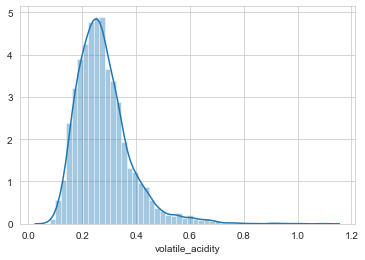

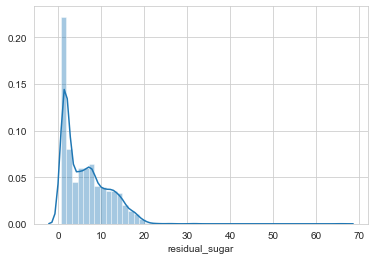

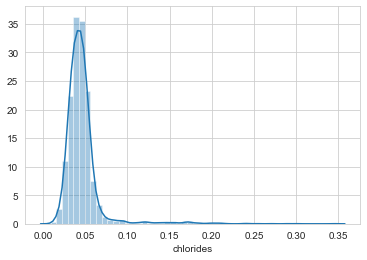

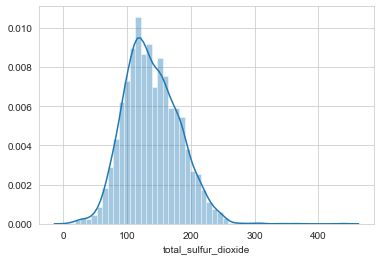

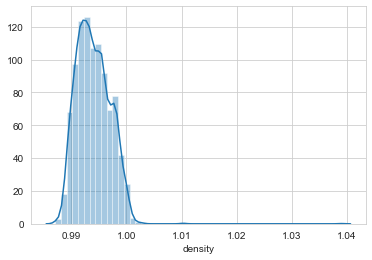

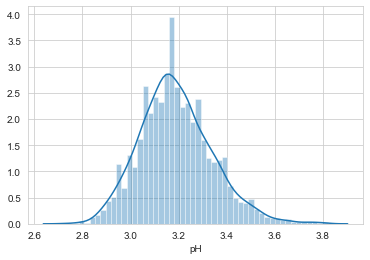

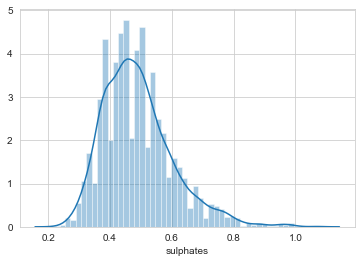

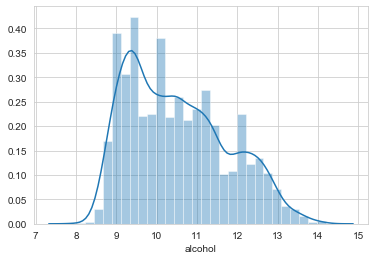

In [610]:
sns.distplot(df['fixed_acidity'])
plt.show()
sns.distplot(df['volatile_acidity'])
plt.show()
sns.distplot(df['residual_sugar'])
plt.show()
sns.distplot(df['chlorides'])
plt.show()
sns.distplot(df['total_sulfur_dioxide'])
plt.show()
sns.distplot(df['density'])
plt.show()
sns.distplot(df['pH'])
plt.show()
sns.distplot(df['sulphates'])
plt.show()
sns.distplot(df['alcohol'])
plt.show()

,feature,skewness
fixed_acidity,fixed_acidity,0.647751
volatile_acidity,volatile_acidity,1.576980
residual_sugar,residual_sugar,1.077094
chlorides,chlorides,5.023331
total_sulfur_dioxide,total_sulfur_dioxide,0.390710
density,density,0.977773
pH,pH,0.457783
sulphates,sulphates,0.977194
alcohol,alcohol,0.487342
quality,quality,0.155796


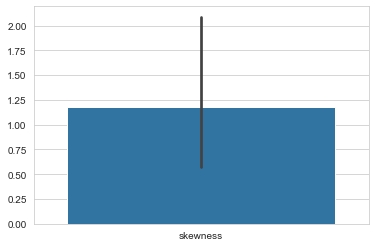

In [611]:
#now we find the skewness of each attribute in the dataset 

skewValue = df.skew(axis=0)
dat=pd.DataFrame({'skewness':skewValue})
sns.barplot(data=dat)
dat1=pd.DataFrame({'feature':df.columns,'skewness':dat['skewness']})
dat1

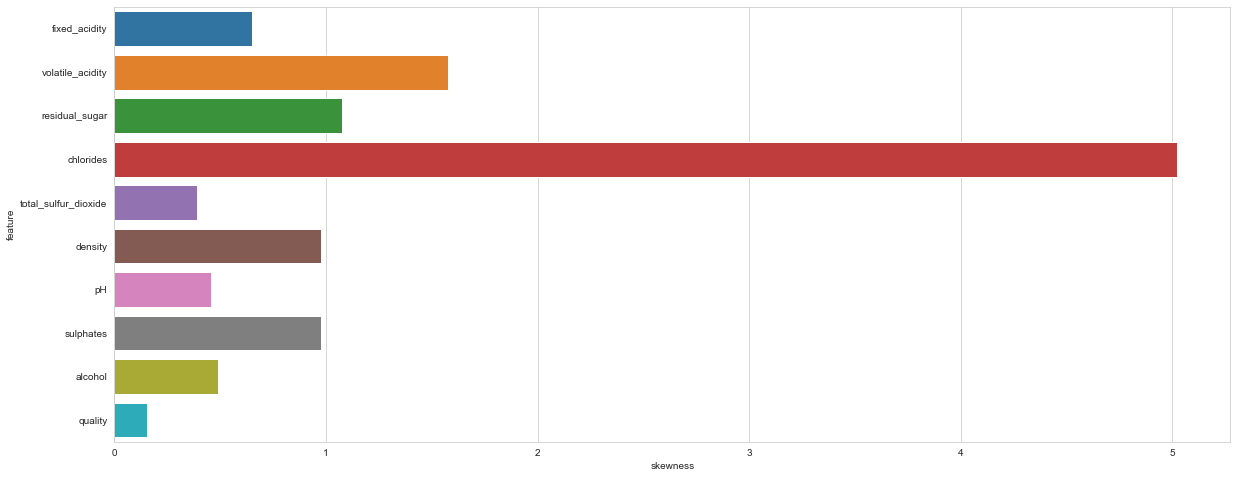

In [612]:
plt.figure(figsize=(20,8))
pl=sns.barplot(x='skewness',y='feature',data=dat1)

In [613]:
df['chlorides'].skew()

5.023330682759707

In [614]:
df['volatile_acidity'].skew()

1.5769795029952025

In [615]:
chlorides_log=np.log(df['chlorides'])
VA_log=np.log(df['volatile_acidity'])

In [616]:
df6 = pd.DataFrame(data=chlorides_log)
df7=pd.DataFrame(data=VA_log)

In [617]:
df= df.assign(chlorides=df6['chlorides'])
df=df.assign(volatile_acidity=df7['volatile_acidity'])
df

,fixed_acidity,volatile_acidity,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,-1.309333,20.7,-3.101093,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,-1.203973,1.6,-3.015935,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,-1.272966,6.9,-2.995732,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,-1.469676,8.5,-2.847312,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,-1.469676,8.5,-2.847312,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...
4893,6.2,-1.560648,1.6,-3.244194,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,-1.139434,8.0,-3.057608,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,-1.427116,1.2,-3.194183,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,-1.237874,1.1,-3.816713,110.0,0.98869,3.34,0.38,12.8,7


,feature,skewness
fixed_acidity,fixed_acidity,0.647751
volatile_acidity,volatile_acidity,0.139383
residual_sugar,residual_sugar,1.077094
chlorides,chlorides,1.134134
total_sulfur_dioxide,total_sulfur_dioxide,0.390710
density,density,0.977773
pH,pH,0.457783
sulphates,sulphates,0.977194
alcohol,alcohol,0.487342
quality,quality,0.155796


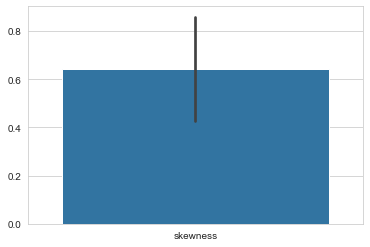

In [618]:
skewValue1 = df.skew(axis=0)
dat1=pd.DataFrame({'skewness':skewValue1})
sns.barplot(data=dat1)
dat2=pd.DataFrame({'feature':df.columns,'skewness':dat1['skewness']})
dat2

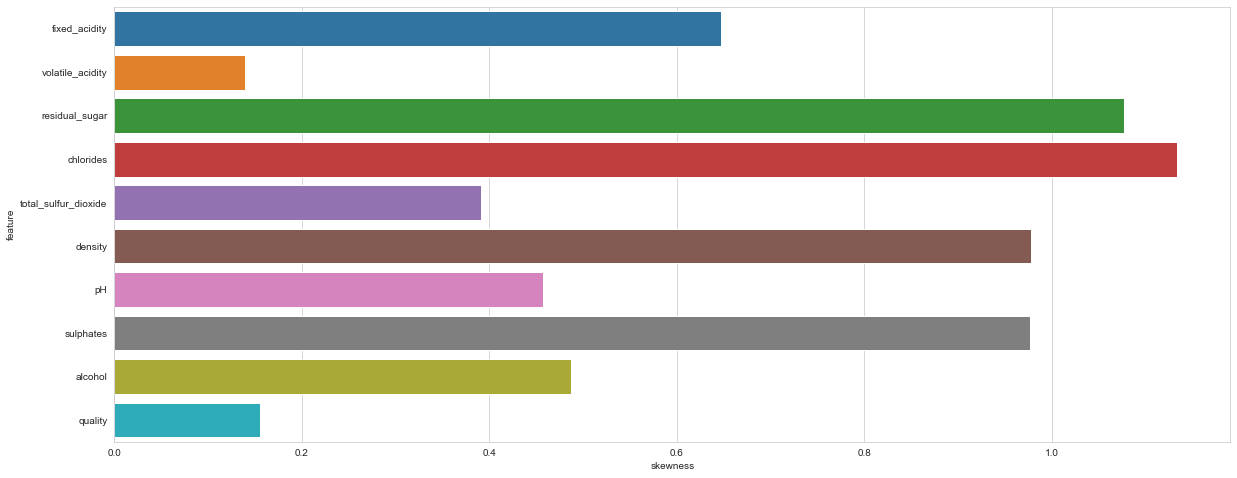

In [619]:
plt.figure(figsize=(20,8))
pl=sns.barplot(x='skewness',y='feature',data=dat2)

# Step 5: Data Mining Algorithms and Models

In [620]:
#Defining training data and targets for prediction
#We remove the quality attribute from the main training data and allocate the last column that is 'quality', 
#as the target measure to train on and whose value has to be predicted by the model.
df1 = df.iloc[:,0:9]
targets=df.iloc[:,9]

In [621]:
df1

,fixed_acidity,volatile_acidity,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.0,-1.309333,20.7,-3.101093,170.0,1.00100,3.00,0.45,8.8
1,6.3,-1.203973,1.6,-3.015935,132.0,0.99400,3.30,0.49,9.5
2,8.1,-1.272966,6.9,-2.995732,97.0,0.99510,3.26,0.44,10.1
3,7.2,-1.469676,8.5,-2.847312,186.0,0.99560,3.19,0.40,9.9
4,7.2,-1.469676,8.5,-2.847312,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...
4893,6.2,-1.560648,1.6,-3.244194,92.0,0.99114,3.27,0.50,11.2
4894,6.6,-1.139434,8.0,-3.057608,168.0,0.99490,3.15,0.46,9.6
4895,6.5,-1.427116,1.2,-3.194183,111.0,0.99254,2.99,0.46,9.4
4896,5.5,-1.237874,1.1,-3.816713,110.0,0.98869,3.34,0.38,12.8


In [622]:
targets=pd.DataFrame(data=targets)
targets

,quality
0,6
1,6
2,6
3,6
4,6
...,...
4893,6
4894,5
4895,6
4896,7


In [623]:
#Checking shapes od the training dataset and the targets to train on
print("Training Data Shape: ",df1.shape)
print("Targets Shape: ",targets.shape)

Training Data Shape:  (4898, 9)
Targets Shape:  (4898, 1)


In [624]:
'''applying data mining algorithms, first we use the train_test_split method to split the current data with 4898
instances into training and testing data with a 80:20 ratio of training and testing data respectively
further we apply various classifiers to fit the model for prediction of the wine quality.'''

'applying data mining algorithms, first we use the train_test_split method to split the current data with 4898\ninstances into training and testing data with a 80:20 ratio of training and testing data respectively\nfurther we apply various classifiers to fit the model for prediction of the wine quality.'

In [625]:
train_x , test_x , train_y , test_y = train_test_split(df1,targets, train_size = 0.8)

## Linear Regression Classifier

mean of the volatile acidity variable =  -1.3375746239960429
mean of the volatile acidity variable after normalization =  -7.688600448200349e-17

Ordinary Least Square regression model for the association between the amount of volatile acidity in wine and the quality of wine:
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     198.4
Date:                Sat, 02 May 2020   Prob (F-statistic):           3.31e-44
Time:                        17:41:11   Log-Likelihood:                -6257.3
No. Observations:                4898   AIC:                         1.252e+04
Df Residuals:                    4896   BIC:                         1.253e+04
Df Model:                           1                                         
Covariance T

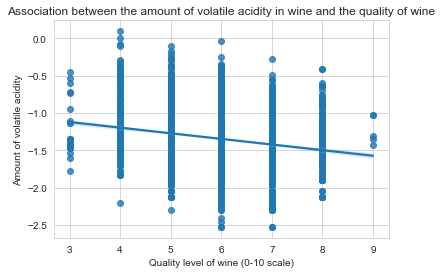

In [626]:
#Linear Regression
import seaborn
import statsmodels.api as sm
import statsmodels.formula.api as smf

scat0 = seaborn.regplot(x="quality", y="volatile_acidity", fit_reg=True, data=df)
plt.xlabel("Quality level of wine (0-10 scale)")
plt.ylabel("Amount of volatile acidity")
plt.title("Association between the amount of volatile acidity in wine and the quality of wine")


# centering the explanatory variable by subrtacting the mean
volatile_acidity_mean = df["volatile_acidity"].mean()
print("mean of the volatile acidity variable = ", volatile_acidity_mean)
df["volatile_acidity"] = df["volatile_acidity"] - volatile_acidity_mean
print("mean of the volatile acidity variable after normalization = ",df["volatile_acidity"].mean())

print ("\nOrdinary Least Square regression model for the association between the amount of volatile acidity in wine and the quality of wine:")
model1 = smf.ols(formula="quality ~ volatile_acidity", data=df)
results1 = model1.fit()
print(results1.summary())

## Logistic Regression Classifier

/Users/mihikagupta/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The Logistic Regression accuracy is:  54.285714285714285


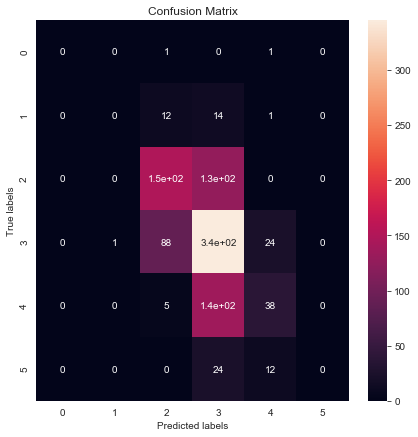

In [627]:
#Logistic regression
from sklearn.linear_model import LogisticRegression


regression=LogisticRegression(max_iter=5000)
regression.fit(train_x,train_y.values.ravel())
predicted_regression=regression.predict(test_x)

acc_regression= (accuracy_score(test_y, predicted_regression)) * 100
print("The Logistic Regression accuracy is: ",acc_regression)

cm = confusion_matrix(test_y,predicted_regression)
fig = plt.figure(figsize=(7,7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

## Support Vector Classifier

The SVM Classifier accuracy is:  46.73469387755102


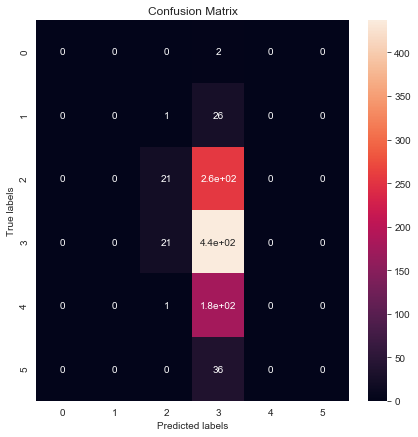

In [628]:
#Support vector classifier
import sklearn
svc = SVC()

svc.fit(train_x,train_y.values.ravel())
predicted_svc = svc.predict(test_x)
acc_svc = (accuracy_score(test_y, predicted_svc)) * 100
print("The SVM Classifier accuracy is: ",acc_svc)

cm = confusion_matrix(test_y,predicted_svc)
fig = plt.figure(figsize=(7,7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

## Random Forest Classifier 

The Random Forest Classifier accuracy is:  68.06122448979592
Confusion matrix:
 [[  0   1   0   0   1   0]
 [  0   3  13   9   2   0]
 [  0   3 195  76   3   0]
 [  0   2  72 361  23   0]
 [  0   0  10  75  94   1]
 [  0   0   1  11  10  14]]


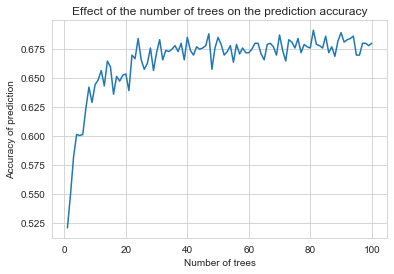

In [635]:
#Random Forest Classifier
rf = RandomForestClassifier(n_estimators=20)
rf.fit(train_x, train_y.values.ravel())
predicted_rf = rf.predict(test_x)
acc_rf = (accuracy_score(test_y, predicted_rf)) * 100
print("The Random Forest Classifier accuracy is: ",acc_rf)
print('Confusion matrix:\n', sklearn.metrics.confusion_matrix(test_y, predicted_rf))

# run different numbers of trees to see the effect of the number on the accuracy of the prediction
n = 100
ac_rf=68.14
acc_rf = [0]*n

for i in range(n):
    rf = RandomForestClassifier(n_estimators=i+1)
    rf.fit(train_x, train_y.values.ravel())
    predicted_rf = rf.predict(test_x)
    acc_rf[i] = sklearn.metrics.accuracy_score(test_y,predicted_rf)

plt.plot(range(1, n+1), acc_rf)
plt.xlabel("Number of trees")
plt.ylabel("Accuracy of prediction")
plt.title("Effect of the number of trees on the prediction accuracy")
plt.show()    

## K Nearest Neighbor Classifier 

The kNN Classifier accuracy is:  51.02040816326531
RMSE: 0.9588470968314191


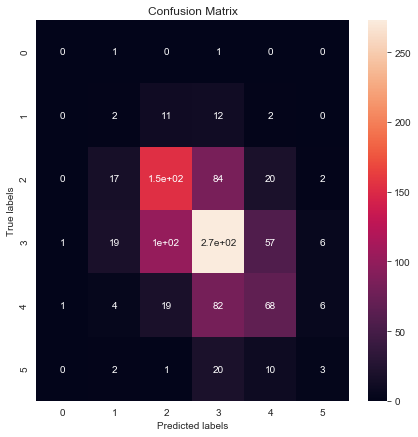

In [636]:
# kNN Classifier
from sklearn.metrics import mean_squared_error
from math import sqrt
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_x, train_y.values.ravel())
predicted_knn = knn.predict(test_x)
acc_knn = (accuracy_score(test_y, predicted_knn)) * 100
print("The kNN Classifier accuracy is: ",acc_knn)
print ('RMSE:', mean_squared_error(predicted_knn,test_y) ** 0.5)

cm = confusion_matrix(test_y,predicted_knn)
fig = plt.figure(figsize=(7,7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

## Gaussian Classifier

The Gaussian Classifier accuracy is:  48.36734693877551


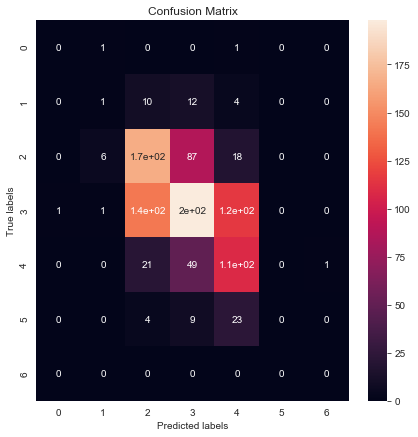

In [637]:
#Gaussian Classifier
gsn = GaussianNB()
gsn.fit(train_x, train_y.values.ravel())
predicted_gsn = gsn.predict(test_x)
acc_gsn = (accuracy_score(test_y, predicted_gsn)) * 100
print("The Gaussian Classifier accuracy is: ",acc_gsn)

cm = confusion_matrix(test_y,predicted_gsn)
fig = plt.figure(figsize=(7,7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

## Gradient boost Classifier

The Gradient Boost Classifier accuracy is:  58.77551020408164


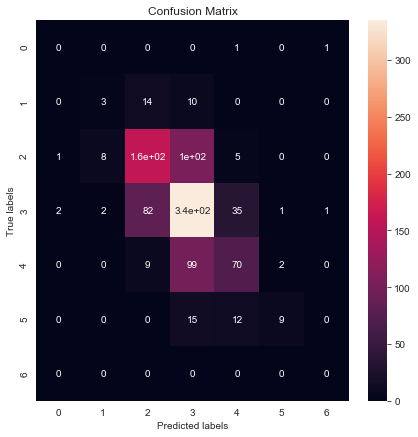

In [638]:
#Gradient Boost Classifier
gbc = GradientBoostingClassifier()
gbc.fit(train_x, train_y.values.ravel())
predicted_gbc = gbc.predict(test_x)
acc_gbc = (accuracy_score(test_y, predicted_gbc)) * 100
print("The Gradient Boost Classifier accuracy is: ",acc_gbc)

cm = confusion_matrix(test_y,predicted_gbc)
fig = plt.figure(figsize=(7,7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

## Ada Boost Classifier

The Ada Boost Classifier accuracy is:  49.28571428571429


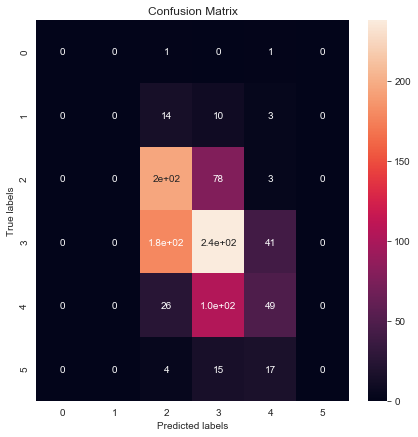

In [639]:
#Ada Boost Classifier
abc = AdaBoostClassifier()
abc.fit(train_x, train_y.values.ravel())
predicted_abc = abc.predict(test_x)
acc_abc = (accuracy_score(test_y, predicted_abc)) * 100
print("The Ada Boost Classifier accuracy is: ",acc_abc)

cm = confusion_matrix(test_y,predicted_abc)
fig = plt.figure(figsize=(7,7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

## Voting Classifier

The Voting Classifier accuracy is:  58.77551020408164


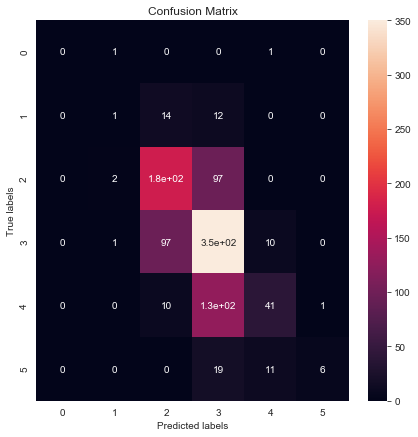

In [640]:
#Voting Classifier
vc = VotingClassifier(estimators=[('svc', svc), ('abc', abc), ('gbc', gbc), ('rf', rf)], voting='hard')
vc.fit(train_x, train_y.values.ravel())
predicted_vc = vc.predict(test_x)
acc_vc = (accuracy_score(test_y, predicted_vc)) * 100
print("The Voting Classifier accuracy is: ",acc_vc)

cm = confusion_matrix(test_y,predicted_vc)
fig = plt.figure(figsize=(7,7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

## Naive Bayes (Bernoulli) Classifier

In [641]:
#Naive bayes


from sklearn.naive_bayes import BernoulliNB
bn= BernoulliNB()
bn.fit(train_x, train_y.values.ravel())
predicted_bn = bn.predict(test_x)
acc_bn = (accuracy_score(test_y, predicted_bn)) * 100
print('accuracy of naive bayes model is :',acc_bn)
# print the confusion matrix and accuracy of the model
print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(test_y, predicted_bn))
print("Gaus:" + str(bn.score(test_x,test_y)))
mse = mean_squared_error(predicted_bn,test_y)
print('MSE:',mse ** 0.5)

accuracy of naive bayes model is : 46.73469387755102
Confusion Matrix:
 [[  0   0   0   2   0   0]
 [  0   0   0  27   0   0]
 [  0   0   0 277   0   0]
 [  0   0   0 458   0   0]
 [  0   0   0 180   0   0]
 [  0   0   0  36   0   0]]
Gaus:0.4673469387755102
MSE: 0.8612994454275921


## Decision Tree Classifier

The Decision Tree Classifier accuracy is:  59.38775510204082


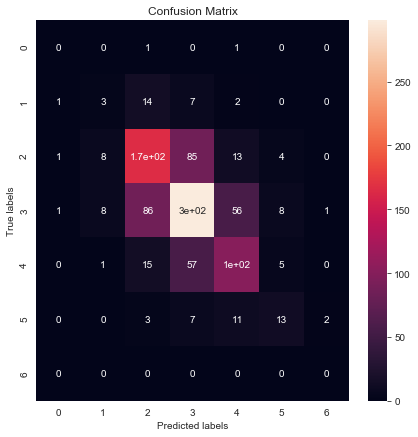

In [642]:
#DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(train_x, train_y.values.ravel())
predicted_dt = dt.predict(test_x)
acc_dt = (accuracy_score(test_y, predicted_dt)) * 100
print("The Decision Tree Classifier accuracy is: ",acc_dt)

cm = confusion_matrix(test_y,predicted_dt)
fig = plt.figure(figsize=(7,7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

# Step 6: Comparing Accuracies

In [646]:
#Now we print the accuracies of all the Classifiers together for a better comparision, in a decending order.


models = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'KNN',
              'Random Forest', 'Gaussian', 'Gradient Boosting', 'AdaBoost', 'Voting Classifier','Naive Bayes','Decision Tree'
              ],
    'Score': [acc_regression,acc_svc, acc_knn, 
              accc_rf, acc_gsn, acc_gbc, 
              acc_abc, acc_vc,acc_bn,acc_dt]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,67.045000
9,Decision Tree,59.387755
5,Gradient Boosting,58.775510
7,Voting Classifier,58.775510
0,Logistic Regression,54.285714
2,KNN,51.020408
6,AdaBoost,49.285714
4,Gaussian,48.367347
1,Support Vector Machines,46.734694
8,Naive Bayes,46.734694


# Step 7: Most Important Attributes

In [647]:
'''Now since Random Forest Classifier works relatively the best , lets find out the most Important contributing 
Attributes using this classifiers Data'''

'Now since Random Forest Classifier works relatively the best , lets find out the most Important contributing \nAttributes using this classifiers Data'

In [648]:
imp_features = OrderedDict(zip(df1.columns,rf.feature_importances_))
imp_features  = pd.DataFrame(index=imp_features .keys(), data=imp_features .values(),
                          columns=['feature_importance']).sort_values(by='feature_importance', ascending=False)
imp_features 

,feature_importance
alcohol,0.130335
density,0.122986
volatile_acidity,0.122624
total_sulfur_dioxide,0.114021
residual_sugar,0.107722
pH,0.105323
chlorides,0.102607
sulphates,0.100868
fixed_acidity,0.093514


## Most Important parameters for wine quality prediction

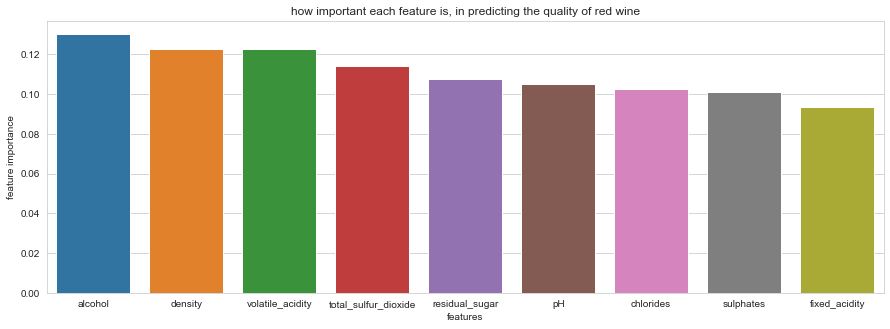

In [649]:
plt.figure(figsize=(15,5))
sns.barplot(x=imp_features .index, y=imp_features ['feature_importance'])
plt.ylabel('feature importance')
plt.xlabel('features')
plt.title('how important each feature is, in predicting the quality of red wine')
plt.show()

In [650]:
'''Therefore we conclude that Alcohol is by far the most important contributing factor to the Wine Quality'''

'Therefore we conclude that Alcohol is by far the most important contributing factor to the Wine Quality'